<a href="https://colab.research.google.com/github/YMKO-lab/Recommendation-System-Ecommerce/blob/main/e_commerce_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

One of the main benefits of using recommendation systems is that they can help e-commerce companies increase customer engagement and satisfaction. By providing personalized recommendations that are tailored to the individual interests of each customer, these systems can help customers discover new products or services that they might be interested in, which can lead to increased sales and customer loyalty.

Additionally, recommendation systems can also help e-commerce companies improve their customer targeting and marketing efforts. By analyzing customer data and behavior, these systems can provide valuable insights into customer preferences and interests, which can be used to create more effective marketing campaigns and increase the relevance of the advertisements that are shown to customers.

Overall, the use of recommendation systems is becoming increasingly widespread among e-commerce companies as a way to improve the customer experience, increase sales, and gain a competitive advantage in the market.

##**Truncated SVD**

Truncated singular value decomposition (SVD) can be used in a recommendation system. SVD is a matrix factorization technique that decomposes a matrix into the product of three matrices: a user-to-concept matrix, a diagonal matrix of singular values, and a concept-to-item matrix.

In a recommendation system, the user-to-concept matrix and the concept-to-item matrix can be used to make recommendations to users based on their past behavior. The user-to-concept matrix maps each user to a set of latent concepts, and the concept-to-item matrix maps each concept to a set of items. By multiplying these two matrices, we can obtain a predicted rating for each user-item pair.

Truncated SVD is a variant of SVD that only computes the largest singular values, and is therefore faster and more memory-efficient than regular SVD. This makes it a good choice for use in large-scale recommendation systems.

To use truncated SVD in a recommendation system, you first need to construct a user-item matrix where each entry represents the rating that a user has given to an item. You can then apply truncated SVD to this matrix to obtain the user-to-concept and concept-to-item matrices. Finally, you can use these matrices to make recommendations to users by finding items that are highly related to the concepts that they are most interested in.



##**The objective is to build a recommendation system to suggest similar items to clients based on their past ratings for other items.**

Types of recommendations:
There are mainly 6 types of the recommendations systems :-

**Popularity based systems** :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.

**Classification model based**:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is interested or not in the prodcut.

**Content based recommedations**:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.

**Collaberative Filtering**:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types: a) User-User b) Item -Item

**Hybrid Approaches**:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches .

**Association rule mining**:- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions.

#**Step 0: Import Libraries**

In [1]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings('ignore')

The **truncated singular value decomposition (SVD)** can be used in a recommendation system.

SVD is a matrix factorization technique that decomposes a matrix into the product of three matrices: a user-to-concept matrix, a diagonal matrix of singular values, and a concept-to-item matrix.



#**Step 1: Import Dataset**

The dataset was from kaggle and can also be found here: http://jmcauley.ucsd.edu/data/amazon/

In [4]:
!unzip '/content/drive/MyDrive/Data for ML DeepLearning AI/amazon_product_ratings.zip'

Archive:  /content/drive/MyDrive/Data for ML DeepLearning AI/amazon_product_ratings.zip
  inflating: ratings_Electronics (1).csv  


There is only one dataset in the file

In [5]:
# load dataset

df = pd.read_csv('ratings_Electronics (1).csv', names=['userId', 'productId', 'Rating', 'timestamp'])

In [6]:
# view the dataset
df.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [7]:
df.tail()

,userId,productId,Rating,timestamp
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
7824481,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200


##**Data Cleaning**

In [8]:
# We will remove the 'timestamp' column, it will not have an affect on
# Exploratory Data Analysis.

df.drop(['timestamp'], axis=1, inplace=True)

In [9]:
# view dataframe
df.head()

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [10]:
# check for missing values
df.isnull().sum()

userId       0
productId    0
Rating       0
dtype: int64

There are no missing values.

#**Step 2: Exploratory Data Analysis**

In [11]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   Rating     float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In this DataFrame, there are 3 columns:

**userId**: an object that represents the ID of the user who provided the rating

**productId**: an object that represents the ID of the product that was rated

**Rating**: a float (a decimal value) that represents the rating that the user provided for the product.

**There are also 7824482 rows, which means that there are 7824482 ratings in the DataFrame.**

In [12]:
# check shape
df.shape

(7824482, 3)

In [13]:
# check dataframe description
df.describe()

,Rating
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


The mean can be used to represent the average of a set of values. In this case, the mean of the ratings is 4.01, which could potentially represent the average rating of a product.

In [14]:
# find the minimum and maximum ratings

print('Minimum rating is: %d' %(df.Rating.min()))
print('Maximum rating is: %d' %(df.Rating.max()))

Minimum rating is: 1
Maximum rating is: 5


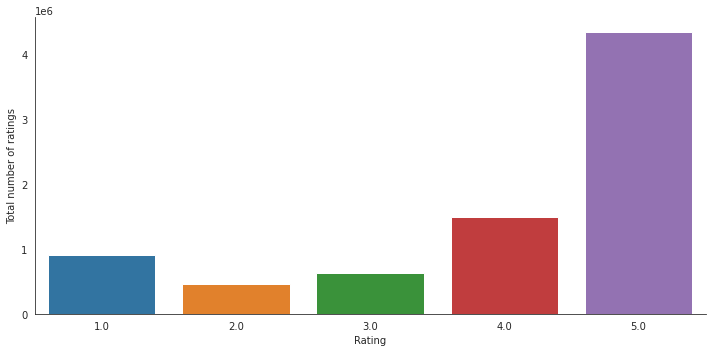

In [15]:
# set the style of the plot to white

with sns.axes_style('white'):
  # create a bar plot of the 'Rating' column of the DataFrame
  g = sns.factorplot('Rating', data=df, aspect=2.0, kind='count')
  # set the y-axis label
  g.set_ylabels('Total number of ratings');



# the factorplot function is used to create a bar plot.
# the 'Rating' parameter specifies the column from the DataFrame that will be
# used for the x-axis values, and the 'data' parameter specifies the DataFrame 
# to use.

# The set_ylabels function is used to set the y-axis label of the plot. 
# In this case, the label is set to 'Total number of ratings'.

In [16]:
# Get General overview

print("Total data")
print("-"*50)

print("\nTotal no. of ratings: ", df.shape[0])
print("\nTotal no. of Users: ", len(np.unique(df.userId)))
print("\nTotal no. of products: ", len(df.productId))

Total data
--------------------------------------------------

Total no. of ratings:  7824482

Total no. of Users:  4201696

Total no. of products:  7824482


**Now we will group the number of rated products per user.**

In [17]:
no_of_rated_products_per_user = df.groupby(by='userId')['Rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: Rating, dtype: int64

The first column is the 'userId', and the second column is the number of products they have rated.

In [18]:
# get a description of the dataframe
no_of_rated_products_per_user.describe()

count    4.201696e+06
mean     1.862220e+00
std      2.885110e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.200000e+02
Name: Rating, dtype: float64

#**Step 3.1: Popularity-Based Recommendation**

Popularity-based recommendation system operates with the trend. It utilizes the commodities which are in trend right currently. For example, if any product is usually purchased by every new user then there are chances that it may indicate that commodity to the user who just signed up.  The problem with a popularity-based recommendation system is that personalization is not restricted with this method i.e. even though you know the behavior of the user you cannot recommend commodities accordingly.

In [19]:
# create a new dataframe which contains users who has given 50 or more ratings

df_2 = df.groupby('productId').filter(lambda x:x['Rating'].count() >=50)

In [20]:
df_2.head()

,userId,productId,Rating
183,A1BKC6B7YHYTVV,0972683275,4.0
184,AWVFSIB42LHKJ,0972683275,4.0
185,A36MQBNADRH8YY,0972683275,5.0
186,A3SRXMPLAEZ6DP,0972683275,4.0
187,A20XXTXWF2TCPY,0972683275,5.0


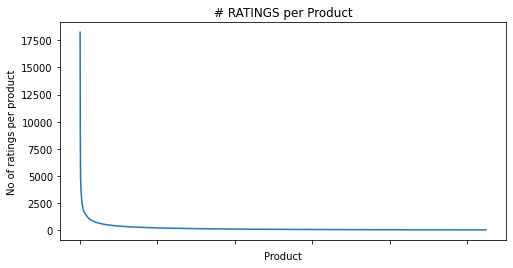

In [21]:
no_of_ratings_per_product = df_2.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [22]:
no_of_ratings_per_product

productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
              ...  
B002653KNQ       50
B001W81LZ2       50
B0001G6UES       50
B008NC8IB0       50
B0012Y6VQA       50
Name: Rating, Length: 26226, dtype: int64

In [23]:
# using the groupby method to group "df_2" by
# the 'productId' column.
# Using the 'mean' method to calculate the average rating
# of each product

# lets view the mean of 'productId' 'Rating'
df_2.groupby('productId')['Rating'].mean().head()

productId
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
Name: Rating, dtype: float64

In [24]:
# Using the 'mean' method to calculate the average rating
# "sort_values" method has an ascending parameter, which is set to false.
# Meaning the data will be sorted in desceding order, with the highest values 
# appearing first.

# Sort the 'productId' 'Rating' 
df_2.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()

productId
B002E6R7NG    4.980392
B004I763AW    4.966667
B003J9QQWU    4.964286
B0043ZLFXE    4.955556
B000TMFYBO    4.953125
Name: Rating, dtype: float64

In [25]:
# using the 'count' method to count the number of number of ratings for each product
# the dataframe will be sorted in desceding order

df_2.groupby('productId')['Rating'].count().sort_values(ascending=False).head()

productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: Rating, dtype: int64

In [26]:
# now we will create a new dataframe 
# that contains the average rating of each product in the df_2 dataframe

ratings_mean_count = pd.DataFrame(df_2.groupby('productId')['Rating'].mean())

In [27]:
ratings_mean_count.head()

,Rating
productId,
0972683275,4.470980
1400501466,3.560000
1400501520,4.243902
1400501776,3.884892
1400532620,3.684211


In [28]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df_2.groupby('productId')['Rating'].count())

In [29]:
ratings_mean_count.head()

,Rating,rating_counts
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


In [30]:
# finding the maximum value in a column can be useful.
# it could be used to identify the most popular product 
# in the dataset, based on the number of ratings it has received.


# Find the largest number of ratings for a product
ratings_mean_count['rating_counts'].max()

18244

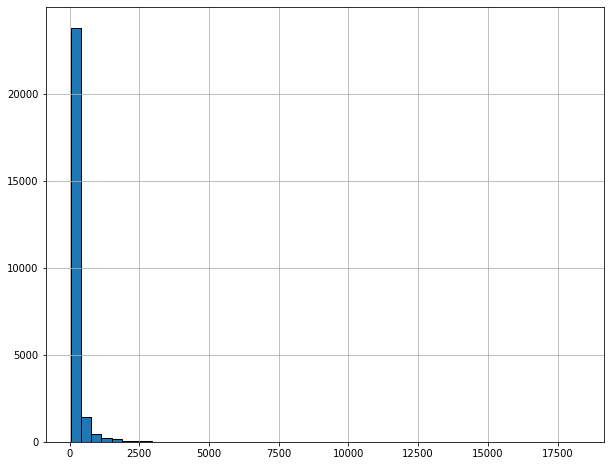

In [31]:
# using matplotlib to create a histogram of the values in the 'rating_counts' column

plt.figure(figsize=(10, 8))

# the 'rcParms' method is being used ti set the 'path.force_edgecolor' parameter to True
# which will ensure that the bars in the histogram are outlined black. 
plt.rcParams['patch.force_edgecolor'] = True

# the 'hist' method is used to create the histogram
# with the 'bins' parameter set to 50,
# this will create 50 bins, or intervals, in the histogram.
ratings_mean_count['rating_counts'].hist(bins=50);

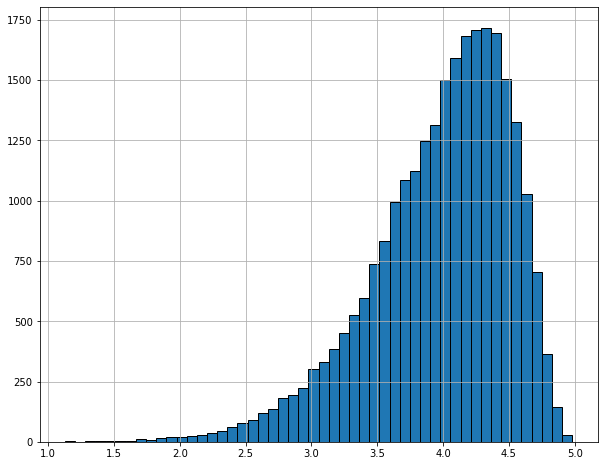

In [32]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=50)

<Figure size 720x576 with 0 Axes>

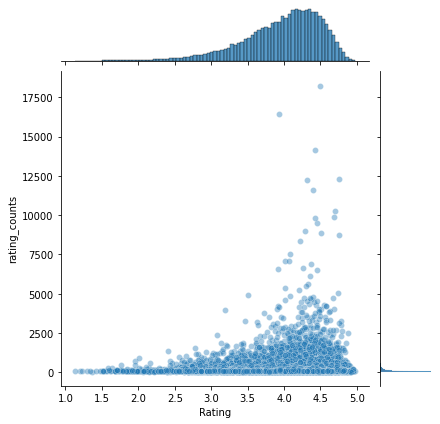

In [33]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True

# the "sns.jointplot" function creates a scatter plot with
# a regression line to show the relationship between two variables.
# the "apla" parameter determines the transparency of the data points in the plot.
sns.jointplot(x='Rating',y='rating_counts', data=ratings_mean_count, alpha=0.4)

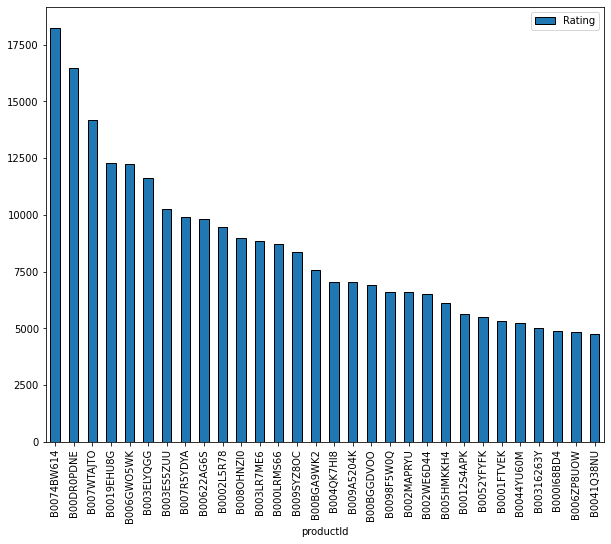

In [34]:
# create a new dataframe for the popular products in the dataset
popular_products = pd.DataFrame(df_2.groupby('productId')['Rating'].count())

# sort the values of the new dataframe in descending order
# the sorted dataframe will be called 'most_popular'
most_popular = popular_products.sort_values('Rating', ascending=False)

# visualize the 'most_popular' dataframe with a bar graph.
most_popular.head(30).plot(kind='bar', figsize=(10,8))

#**Step 3.2: Model-based collaborative filtering system**

This method is based on machine learning and data mining techniques. The purpose is to train models to be able to make predictions. For example, we could use existing user-item interactions to prepare a model to forecast the top 5 items that a user might consider the most. One advantage of this method is that they can instruct a more extensive number of items to a more considerable number of users, compared to other methods like the memory-based approach. They have immense coverage, even when operating with large sparse matrices.

In [35]:
# lets create a new dataframe from the 'df_2' dataframe
# and only using the top 10,000 values from the 'df_2' dataframe
new_df = df_2.head(10000)

In [36]:
# pivot the dataframe
# the 'fill_value' parameter is set to '0', meaning the missing values in the
# pivot table will be filled with '0'
new_df_pt = new_df.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
new_df_pt.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userId,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# check the shape 
new_df_pt.shape

(9832, 76)

In [38]:
# lets transpose the dataframe
# this will be useful to make it easir to perform mathematical operations
# on the rows or colums

X = new_df_pt.T

In [39]:
X.head()

userId,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Create a TruncatedSVD object
svd = TruncatedSVD(n_components=10)

# decomposed_matrix 
decomposed_matrix = svd.fit_transform(X)
# get shape of decomposed matrix
decomposed_matrix.shape

(76, 10)

In [42]:

# The "correlation_matrix" is being assigned the result
# of calling 'np.corrcoef()' on the "decomposed_matrix"

# The 'np.corrcoef()' calculates the Pearson correlation coefficient
# for each pair of columns in the input matrix.
# The Pearson correlation coefficient is a measure of the linear correlation 
# between two variables

correlation_matrix = np.corrcoef(decomposed_matrix)

correlation_matrix.shape


(76, 76)

In [50]:
# Index number of product ID purchased by customer
i = X.index[75]

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

75

In [51]:
# Correlation for all items with the item purchased by the customer based on items
# rated by other customers who bought the same product

correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(76,)

In [63]:
# Create a "Recommend" that creates a list of products
# and matches them with products already bought by the customer

Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i)

# Recommend 25 products
Recommend[0:24]

['7214047977',
 '9983891212',
 '9984984354',
 'B00000J0D2',
 'B00000J1EJ',
 'B00000J1QK',
 'B00000J1U8',
 'B00000J1V3',
 'B00000JBAT',
 'B00000JBHP',
 'B00000JCT8',
 'B00000JCTO',
 'B00000JFE3',
 'B00000JMUG',
 'B00000JYWQ']